## Poisson Distribution

1. Why did Poisson invent Poisson Distribution?

To predict the probability of a given number of events occurring in a fixed interval of time.

If you ever sold something, this “event” can be defined, for example, as a customer purchases something from you (the moment of truth, not just browsing). It can be how many visitors you get on your website a day, how many clicks your ads get for the next month, how many phone calls you get during your shift, or even how many people will die from a fatal disease next year, etc.

### Problem specification

Number of people who read per week (n) = 59k/52 = 1134

Number of people who clap read per week (x) = 888/52 = 17

Success probability (p) : 888/59k = 0.015 = 1.5%

Given these information what is the probability of getting exactly 20 claps next week ?
https://medium.com/@aerinykim/poisson-distribution-intuition-and-derivation-1059aeab90d


In [52]:
num_of_reader_per_week=59000//52
num_of_reader_claps_per_week=888//52
prob_of_clap=round(889/59000,5)

## Lets calculate the probability of getting exactly 20 claps using the Binomial probability mass function


$$ Binomial P(X=x) = {n \choose x} p^x (1-p)^{n-x}$$

In [55]:
from scipy.special import comb
import math

def binomial_pmf(n,x,p):
    return round(comb(n,x)*(p**x)*(1-p)**(n-x),5)

In [54]:
# Probability of getting 20 claps for next week is 6%
binomial_pmf(1134,20,0.015)

0.06962

### The shortcomings of the Binomial Distribution

A binomial random varliable s binary 0/1. 

+ Given we have 17/wk who clapped. 
    + 17 / 7 = 2.4 people clapped per day and 
    + 17 / (7*24) = 0.1 people clapping per hour.

Modelling the success probability by hour (0.1 people/hr) using the binomial random variable means that mosts of the hours get zero claps but some hours will get **exactly 1 clap**. However, it is also very possible that certain hour will get more than 1 clap (2, 3, 5 claps, etc.)


***The problem with binomial is that it can NOT contain more than 1 event in the unit time (in this case, 1 hr). The unit time can only have 0 or 1 event. Then, how about dividing 1 hour into 60 minutes, and make unit time smaller, for example, a minute? Then 1 hour can contain multiple events. (Still, one minute will contain exactly one or zero events.)***


#### Provacative thoughts: What if, during that one minute, we get multiple claps? (i.e. someone shared your blog post on Twitter and the traffic spiked at that minute.) 

#### So what, we can divide a minute into seconds. 

+ Then our time unit becomes a second and again a minute can contain multiple events. But this binary container problem will always exist for ever-smaller time units.

#### Then what to do ?

The idea is, we can make ***the Binomial random variable handle multiple events by dividing a unit time into smaller units***. By using smaller divisions, we can make the original unit time contain more than one event.

+ Mathematically, this means n → ∞. Since we assume the rate is fixed, we must have p → 0. Because otherwise, n*p, which is the number of events, will blow up.

+ Using the limit, the unit times are now infinitesimal. We no longer have to worry about more than one event occurring within the same unit time. And this is how we derive ***Poisson distribution***.



#### Briafly Binomial distribution vs Poisson distributionl

***In the Binomial distribution***, the # of trials (n) should be known before hand. If you use Binomial, you cannot calculate the success probability only with the rate (i.e. 17 ppl/week). You need “more info” (n & p) in order to use the binomial PMF.


***The Poisson Distribution***, on the other hand, doesn’t require you to know n nor p. We are assuming n is infinitely large and p is infinitesimal. The only parameter of the Poisson distribution is the rate λ (the expected value of x). In real life, only knowing the rate (i.e., during 2pm~4pm, I received 3 phone calls) is much more common than knowing both n & p.

### Let's derive the Poisson formula mathematically from the Binomial PMF


$$ P(X=k)= L_{n\rightarrow \infty}  {n \choose k} p^k (1-p)^{n-k}$$


$ p=\frac{\lambda}{n} : n\rightarrow \infty, p\rightarrow 0$



$$ P(X=k)=L_{n\rightarrow \infty} {n \choose k}  \Big(\frac{\lambda}{n}\Big)^k \Big(1-\frac{\lambda}{n}\Big)^{n-k}$$


$$ P(X=k)= L_{n\rightarrow \infty} \frac{n!}{(n-k)! k!} \Big(\frac{\lambda}{n}\Big)^k \Big(1-\frac{\lambda}{n}\Big)^n \Big(1-\frac{\lambda}{n}\Big)^{-k}$$



$\Big(1-\frac{\lambda}{n}\Big)^{-k}=1$

$\Big(1-\frac{\lambda}{n}\Big)^{n}=e^{-\lambda}$



$$ P(X=k)= L_{n\rightarrow \infty} \frac{n!}{(n-k)!} \frac{1}{n^k} \frac{\lambda^k}{k!} e^{\lambda} 1 $$


as $n\rightarrow \infty$ the first term becomes to **1**.

#### Finally we get the Poisson distribution

$$ Poisson Probability(k)= e^{-\lambda} \frac{\lambda^k}{k!},$$

where 
+ $\lambda$ is the average number of events per interval
+ $e$ (the Euler's number) is 2.71828 the base of natural logarithm 
+ k takes values of 0, 1, 2--

In [68]:
def poisson_prob(k,_lambda):
    return math.e**(-_lambda) * (_lambda**k/math.factorial(k))

In [69]:
poisson_prob(20,17)

0.06915882695522842

In [70]:
binomial_pmf(1134,20,0.015)

0.06962

https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe

In [1]:
import numpy as np
import scipy.optimize as opt
%matplotlib inline
import matplotlib.pylab as mpl

import scipy.special as ss

In [2]:
objective=np.poly1d([1.3,4.0,0.6])

$objective=1.3x^2+4x+0.6$

In [3]:
x_=opt.fmin(objective,[3])
"solved: x={}".format(x_)

Optimization terminated successfully.
         Current function value: -2.476923
         Iterations: 20
         Function evaluations: 40


'solved: x=[-1.53845215]'

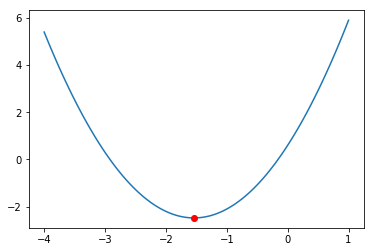

In [4]:
x=np.linspace(-4,1,101)
mpl.plot(x,objective(x))
mpl.plot(x_,objective(x_),'ro')


## Isn't it beautiful?

## Box constrains

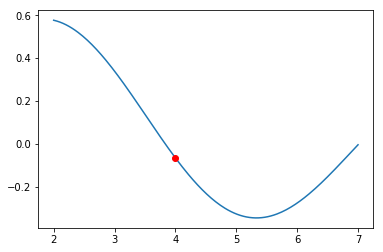

In [5]:

import scipy.special as ss
import scipy.optimize as opt
import numpy as np
import matplotlib.pylab as mpl

x = np.linspace(2, 7, 200)

# 1st order Bessel
j1x = ss.j1(x)
mpl.plot(x, j1x)

# use scipy.optimize's more modern "results object" interface
result = opt.minimize_scalar(ss.j1, method="bounded", bounds=[2, 4])

j1_min = ss.j1(result.x)
mpl.plot(result.x, j1_min,'ro')

# Variational Inference

### Markov Chain Monte Carlo Algorithms

+ Construct a Markov chain whose stationary distribution is the posterior distribution
Sample from the Markov chain for a long time
Approximate posterior quantities using the empirical distribution of the samples
To produce an interesting MCMC animation, we simulate a linear regression data set and animate samples from the posteriors of the regression coefficients.

In [6]:
#from edward.stats import bernoulli, normal, uniform
#from edward.models import Normal
from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
import pymc3 as pm
from pymc3.distributions import draw_values
from pymc3.distributions.dist_math import bound
from pymc3.math import logsumexp
import scipy as sp
import seaborn as sns
import tensorflow as tf
from theano import shared, tensor as tt

sns.set()

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [7]:
from IPython.display import HTML

In [8]:
%matplotlib inline

In [9]:
# configure pyplot for readability when rendered as a slideshow and projected
plt.rc('figure', figsize=(8, 6))

LABELSIZE = 14
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)

plt.rc('animation', writer='avconv')

In [10]:
SEED = 69972 # from random.org, for reproducibility

np.random.seed(SEED)

# ### Modes of Bayesian Inference
# 
# * Conjugate models with closed-form posteriors
# * **Markov chain Monte Carlo algorithms**
# * Approximate Bayesian computation
# * Distributional approximations
#     * Laplace approximations, INLA
#     * **Variational inference**

# ## Markov Chain Monte Carlo Algorithms
# 
# * Construct a Markov chain whose stationary distribution is the posterior distribution
# * Sample from the Markov chain for a long time
# * Approximate posterior quantities using the empirical distribution of the samples

# To produce an interesting MCMC animation, we simulate a linear regression data set and animate samples from the posteriors of the regression coefficients.

In [11]:
x_animation = np.linspace(0, 1, 100)
y_animation = 1 - 2 * x_animation + np.random.normal(0., 0.25, size=100)

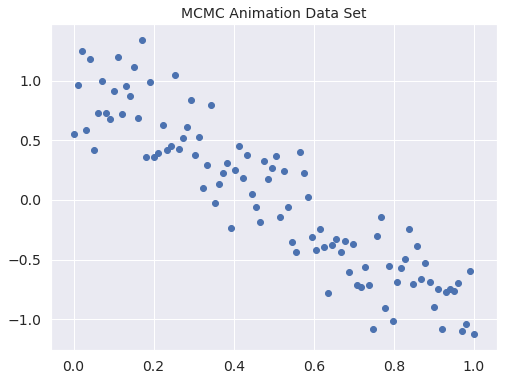

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x_animation, y_animation,
           c='b');

ax.set_title('MCMC Animation Data Set');

### Beta-Binomial Model

We observe three successes in ten trials, and want to infer the true success probability.

In [13]:
x_beta_binomial = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

$$p \sim U(0, 1)$$

In [14]:
import pymc3 as pm

with pm.Model() as beta_binomial_model:
    p_beta_binomial = pm.Uniform('p', 0., 1.)

Applied interval-transform to p and added transformed p_interval_ to model.

$$
\begin{align*}
P(X_i = 1\ |\ p)
    & = p
\end{align*}
$$

In [15]:
with beta_binomial_model:
    x_obs = pm.Bernoulli('y', p_beta_binomial,
                         observed=x_beta_binomial)

$$p\ \left|\ \sum_{i = 1}^{10} X_i \right. = 3 \sim \textrm{Beta}(4, 8)$$

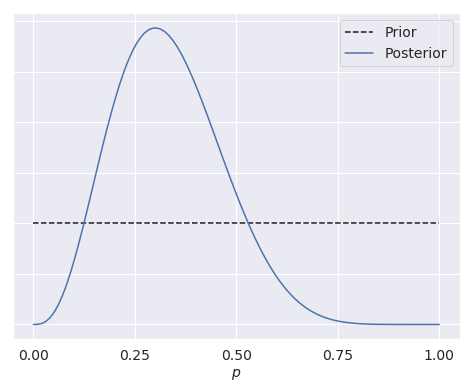

In [17]:
# plot the true beta-binomial posterior distribution
fig, ax = plt.subplots()

prior = sp.stats.uniform(0, 1)
posterior = sp.stats.beta(1 + x_beta_binomial.sum(), 1 + (1 - x_beta_binomial).sum())

plot_x = np.linspace(0, 1, 100)
ax.plot(plot_x, prior.pdf(plot_x),
        '--', c='k', label='Prior');

ax.plot(plot_x, posterior.pdf(plot_x),
        c='b', label='Posterior');

ax.set_xticks(np.linspace(0, 1, 5));
ax.set_xlabel(r'$p$');

ax.set_yticklabels([]);

ax.legend(loc=1);

In [18]:
BETA_BINOMIAL_SAMPLES = 50000
BETA_BINOMIAL_BURN = 10000
BETA_BINOMIAL_THIN = 20

In [19]:
with beta_binomial_model:
    beta_binomial_trace_ = pm.sample(BETA_BINOMIAL_SAMPLES, random_seed=SEED)

beta_binomial_trace = beta_binomial_trace_[BETA_BINOMIAL_BURN::BETA_BINOMIAL_THIN]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 101000/101000 [00:29<00:00, 3466.77draws/s]


In [20]:
bins = np.linspace(0, 1, 50)
ax.hist(beta_binomial_trace['p'], bins=bins, normed=True,
        color='g', lw=0., alpha=0.5,
        label='MCMC approximate posterior');

ax.legend();

/home/demir/anaconda3/envs/pl2vec/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


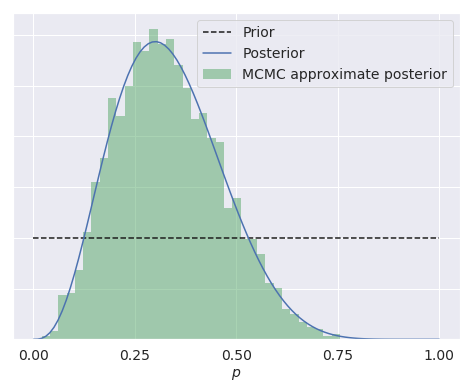

In [21]:
fig

## Variational Inference

* Choose a class of approximating distributions
* Find the best approximation to the true posterior

Variational inference minimizes the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

$$\mathbb{KL}(\color{purple}{q(\theta)} \parallel \color{red}{p(\theta\ |\ \mathcal{D})}) = \mathbb{E}_q\left(\log\left(\frac{\color{purple}{q(\theta)}}{\color{red}{p(\theta\ |\ \mathcal{D})}}\right)\right)$$

from <font color='purple'>approximate distributons</font>, but we can't calculate the true <font color='red'>posterior distribution</font>.

Minimizing the Kullback-Leibler divergence

$$
\mathbb{KL}(\color{purple}{q(\theta)} \parallel \color{red}{p(\theta\ |\ \mathcal{D})}) = -(\underbrace{\mathbb{E}_q(\log \color{blue}{p(\mathcal{D}, \theta))} - \mathbb{E}_q(\color{purple}{\log q(\theta)})}_{\color{orange}{\textrm{ELBO}}}) + \log \color{green}{p(\mathcal{D})}
$$

is equivalent to maximizing the <font color='orange'>Evidence Lower BOund (ELBO)</font>, which only requires calculating the <font color='blue'>joint distribution</font>.

### Variational Inference Example

In this example, we minimize the Kullback-Leibler divergence between a full-rank covariance Gaussian distribution and a diagonal covariance Gaussian distribution.

In [22]:
SIGMA_X = 1.
SIGMA_Y = np.sqrt(0.5)
CORR_COEF = 0.75

true_cov = np.array([[SIGMA_X**2, CORR_COEF * SIGMA_X * SIGMA_Y],
                     [CORR_COEF * SIGMA_X * SIGMA_Y, SIGMA_Y**2]])
true_precision = np.linalg.inv(true_cov)

approx_sigma_x, approx_sigma_y = 1. / np.sqrt(np.diag(true_precision))

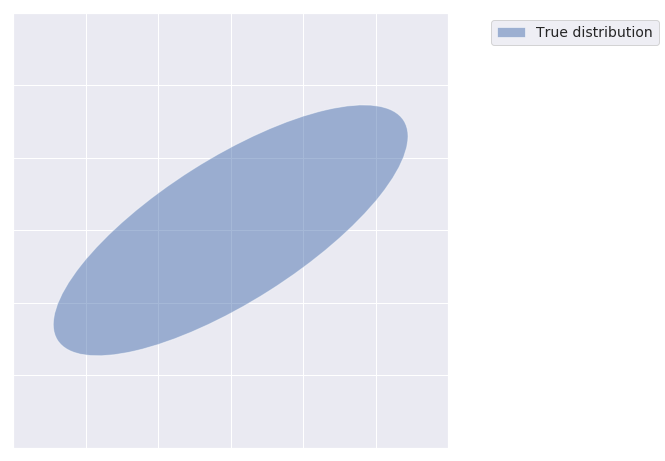

In [25]:
fig, ax  = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal');


var, U = np.linalg.eig(true_cov)
angle = 180. / np.pi * np.arccos(np.abs(U[0, 0]))

e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), angle=angle)
e.set_alpha(0.5)
e.set_facecolor('b')
e.set_zorder(10);
ax.add_artist(e);

ax.set_xlim(-3, 3);
ax.set_xticklabels([]);

ax.set_ylim(-3, 3);
ax.set_yticklabels([]);

rect = plt.Rectangle((0, 0), 1, 1, fc='b', alpha=0.5)
ax.legend([rect],
          ['True distribution'],
          bbox_to_anchor=(1.5, 1.));

Approximate the true distribution using a diagonal covariance Gaussian from the class

$$\mathcal{Q} = \left\{\left.N\left(\begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix},
                              \begin{pmatrix} \sigma_x^2 & 0 \\ 0 & \sigma_y^2\end{pmatrix}\ \right|\ 
                       \mu_x, \mu_y \in \mathbb{R}^2, \sigma_x, \sigma_y > 0\right)\right\}$$

In [27]:
blue='b'
red='r'
green='g'

In [28]:
vi_e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991) * approx_sigma_x, 2 * np.sqrt(5.991) * approx_sigma_y)
vi_e.set_alpha(0.4)
vi_e.set_facecolor(red)
vi_e.set_zorder(11);
ax.add_artist(vi_e);

vi_rect = plt.Rectangle((0, 0), 1, 1, fc=red, alpha=0.75)

ax.legend([rect, vi_rect],
          ['Posterior distribution',
           'Variational approximation'],
          bbox_to_anchor=(1.55, 1.));

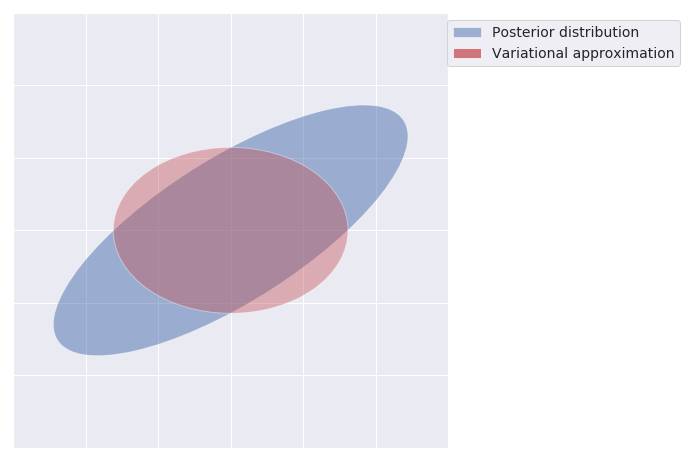

In [29]:
fig

### Pros

* A principled method to trade complexity for bias
* Optimization theory is applicable
    * Assesment of convergence
    * Scalability
    
### Cons

* Biased estimate of the true posterior
    * Better for prediction than interpretation
* Model-specific algorithms


### Mean field variational inference

Assume the variational distribution factors independently as $q(\theta_1, \ldots, \theta_n) = q(\theta_1) \cdots q(\theta_n)$

The variational approximation can be found by **coordinate ascent**

$$
\begin{align*}
q(\theta_i)
    & \propto \exp\left(\mathbb{E}_{q_{-i}}(\log(\mathcal{D}, \boldsymbol{\theta}))\right) \\
q_{-i}(\boldsymbol{\theta})
    & = q(\theta_1) \cdots q(\theta_{i - 1})\ q(\theta_{i + 1}) \cdots q(\theta_n)
\end{align*}
$$

#### Coordinate Ascent Cons

* Calculations are tedious, even when possible
* Convergence is slow when the number of parameters is large



## Automating Variational Inference in Python

* Maximize <font color='orange'>ELBO</font> using gradient ascent instead of coordinate ascent
* Tensor libraries calculate <font color='orange'>ELBO</font> gradients automatically


<table>
    <tr>
        <th><center>Python Package</center></th>
        <th><center>Tensor Library</center></th>
        <th><center>Variational Inference Algorithm(s)</center></th>
    <tr>
    <tr>
        <td><center><a href='http://edwardlib.org/'>Edward</a></center></td>
        <td><center><a href='https://www.tensorflow.org/'>TensorFlow</a></center></td>
        <td><center><a href='https://arxiv.org/abs/1401.0118'>Black Box Variational Inference</a> (BBVI)</center></td>
    </tr>
    <tr>
        <td><center><a href='http://pymc-devs.github.io/pymc3/'>PyMC3</a></center></td>
        <td><center><a href='http://deeplearning.net/software/theano/'>Theano</a></center></td>
        <td><center><a href='http://arxiv.org/abs/1603.00788'>Automatic Differentiation Variational Inference</a> (ADVI)</center></td>
    </tr>
</table>

### Common themes

* Monte Carlo estimate of the <font color='orange'>ELBO</font> gradient
* Minibatch estimates of the <font color='green'>joint distribution</font>

BBVI and ADVI arise from different ways of calculating the <font color='orange'>ELBO</font> gradient


#### Mathematical details

* Monte Carlo estimate of the ELBO gradient
    * For samples $\tilde{\theta}_1, \ldots, \tilde{\theta}_K \sim q(\theta)$

    $$
    \begin{align*}
    \nabla \textrm{ELBO}
        & = \mathbb{E}_q \left(\nabla\left(\log p(\mathcal{D}, \theta) - \log q(\theta)\right)\right) \\
        & \approx \frac{1}{K} \sum_{i = 1}^K \nabla\left(\log p(\mathcal{D}, \tilde{\theta}_i) - \log q(\tilde{\theta}_i)\right)
    \end{align*}
    $$

* Minibatch estimate of joint distribution
    * Sample data points $\mathbf{x}_1, \ldots, \mathbf{x}_B$ from $\mathcal{D}$

    $$\log p(\mathcal{D}, \theta) \approx \frac{N}{B} \sum_{i = 1}^B \log(\mathbf{x}_i, \theta)$$

BBVI and ADVI arise from different ways of calculating $\nabla \left(\log p(\mathcal{D}, \cdot) - \log q(\cdot)\right)$